In [2]:
import logging
import pandas as pd
from datetime import date
from tdf_pool.cycling_calendar import get_calendar
from tdf_pool.race import Race
from tdf_pool.score import get_score_template, score_race
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

logging.basicConfig(level='INFO')

In [3]:
calendar = pd.concat([get_calendar(year) for year in range(2023, 2024)])

INFO:tdf_pool.cycling_calendar:[ OK ] Read race calender of 2023


In [4]:

tdf_entry = calendar[calendar['Name'] == "Tour de France"].iloc[0]
tdf = Race(tdf_entry['Name'], tdf_entry['Start'], tdf_entry['Type'], tdf_entry['PartialURL'])

INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 1, Bilbao - Bilbao, Date: 2023-07-01, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 2, Vitoria-Gasteiz - San Sébastián, Date: 2023-07-02, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 3, Amorebieta-Etxano - Bayonne, Date: 2023-07-03, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 4, Dax - Nogaro, Date: 2023-07-04, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 5, Pau - Laruns, Date: 2023-07-05, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 6, Tarbes - Cauterets-Cambasque, Date: 2023-07-06, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 7, Mont-de-Marsan - Bordeaux, Date: 2023-07-07, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Tour de France stage 8, Libourne - Limoges, Date: 2023-07-08, Type: Stage>


In [5]:
calendar_before_tdf = calendar[calendar['End'] < tdf.date]
races_before_tdf = [Race(entry['Name'], entry['Start'], entry['Type'], entry['PartialURL']) for _, entry in calendar_before_tdf.iterrows()]

INFO:tdf_pool.stage:[ OK ] Loaded results for <Santos Tour Down Under stage 1, Adelaide  - Adelaide , Date: 2023-01-17, Type: Prologue>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Santos Tour Down Under stage 2, Tanunda - Tanunda, Date: 2023-01-18, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Santos Tour Down Under stage 3, Brighton - Victor Harbor, Date: 2023-01-19, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Santos Tour Down Under stage 4, Norwood - Campbelltown, Date: 2023-01-20, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Santos Tour Down Under stage 5, Port Willunga - Willunga Township, Date: 2023-01-21, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Santos Tour Down Under stage 6, Unley - Mount Lofty, Date: 2023-01-22, Type: Stage>
INFO:tdf_pool.stage:[ OK ] Loaded results for <Cadel Evans Great Ocean Road Race stage 1, Cadel Evans Great Ocean Road Race, Date: 2023-01-29, Type: None>
INFO:tdf_pool.stage:[ OK ] Loaded 

In [6]:
default_score_template = get_score_template()
points_during_tdf = score_race(tdf, default_score_template).sort_values(by='Total', ascending=False).reset_index()
points_before_tdf = pd.concat([score_race(race, default_score_template) for race in races_before_tdf]).groupby(["Rider", "Team"]).sum().sort_values(by='Total', ascending=False).reset_index()

points_before_tdf = points_before_tdf.set_index(['Rider','Team'])
points_during_tdf = points_during_tdf.set_index(['Rider', 'Team'])

INFO:tdf_pool.score:Scoring <Tour de France stage 1, Bilbao - Bilbao, Date: 2023-07-01, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 2, Vitoria-Gasteiz - San Sébastián, Date: 2023-07-02, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 3, Amorebieta-Etxano - Bayonne, Date: 2023-07-03, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 4, Dax - Nogaro, Date: 2023-07-04, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 5, Pau - Laruns, Date: 2023-07-05, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 6, Tarbes - Cauterets-Cambasque, Date: 2023-07-06, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 7, Mont-de-Marsan - Bordeaux, Date: 2023-07-07, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 8, Libourne - Limoges, Date: 2023-07-08, Type: Stage>
INFO:tdf_pool.score:Scoring <Tour de France stage 9, Saint-Léonard-de-Noblat - Puy de Dôme, Date: 2023-07-09, Type: Stage>
INFO:tdf_pool.score:S

<Axes: ylabel='Frequency'>

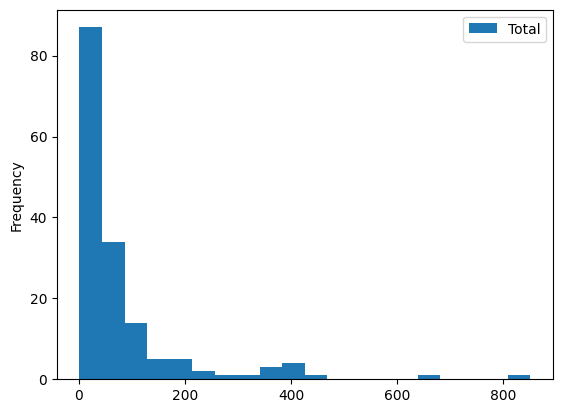

In [7]:
points_during_tdf.plot(y='Total', kind='hist', bins=20)

In [8]:
points_per_rider = points_during_tdf.join(points_before_tdf, how='left', lsuffix='_tdf', rsuffix='_before_tdf')

<Axes: >

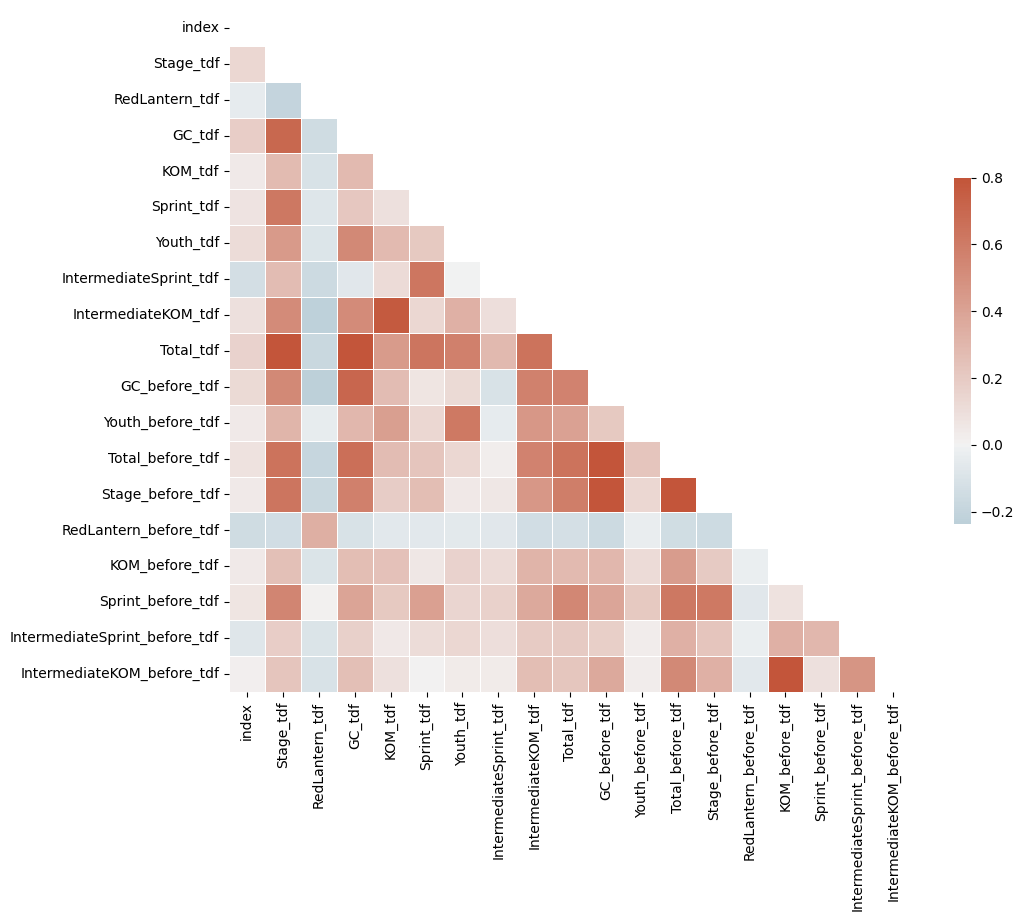

In [9]:
%matplotlib inline
# Compute the correlation matrix
corr = points_per_rider.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})